# Building the Gradient boost using the default hyperparameters

In [1]:
from sklearn.ensemble import GradientBoostingRegressor
import pandas as pd
import os

In [2]:
directory_path = 'Dataset/Split_Samples/All/Real/'

# Read the CSV files
X_train = pd.read_csv(os.path.join(directory_path, "X_Train.csv"), header=0, delimiter=',')
X_test = pd.read_csv(os.path.join(directory_path, "X_Test.csv"), header=0, delimiter=',')
y_train = pd.read_csv(os.path.join(directory_path, "Y_Train.csv"), header=0, delimiter=',')
y_test = pd.read_csv(os.path.join(directory_path, "Y_Test.csv"), header=0, delimiter=',')

# Create the regressor with default parameters
regressor = GradientBoostingRegressor(random_state=80)
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()
# Train the model on the training data
regressor.fit(X_train, y_train)

# Predict using the trained model on the test data
y_pred = regressor.predict(X_test)

In [3]:
regressor.n_estimators

100

# Evaluating the Gradient Boost (the default hyperparameters)- Overfitting detected

In [4]:
from sklearn.metrics import mean_squared_error, r2_score
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate Mean Absolute Error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

import numpy as np
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Overfitting spotted Train- accuracy of 1 indicates overfitted model
print (f'Train Accuracy - : {regressor.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {regressor.score(X_test,y_test):.3f}')

Mean Squared Error: 6396534077.361175
Mean Absolute Error: 61133.33602198653
R-squared: 0.685340644106677
Root Mean Squared Error: 79978.33504994446
Train Accuracy - : 0.710
Test Accuracy - : 0.685


# Checking feature importance of decision tree (with default hyperparameters)

In [10]:
# Get the feature importance scores
feature_importance = regressor.feature_importances_

# Create a DataFrame to display the results
feature_importance_df = pd.DataFrame({'Feature': X_test.columns, 'Importance': feature_importance})

# Sort the DataFrame in descending order of importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance
print(feature_importance_df)


            Feature  Importance
4      HealthDepriv    0.469037
11   AdultSklDepriv    0.195640
13   WiderBarDepriv    0.148118
15    OutdoorDepriv    0.053524
14     IndoorDepriv    0.033321
3      EduSklDepriv    0.028364
6    HousServDepriv    0.026929
10    ChildYPDepriv    0.019359
12     GeoBarDepriv    0.009002
9   OldPplIncDepriv    0.004437
7      LivEnvDepriv    0.003182
5         CrimScore    0.003164
1         IncDepriv    0.002697
2         EmpDepriv    0.001709
8    ChildIncDepriv    0.000908
0          IMDScore    0.000610


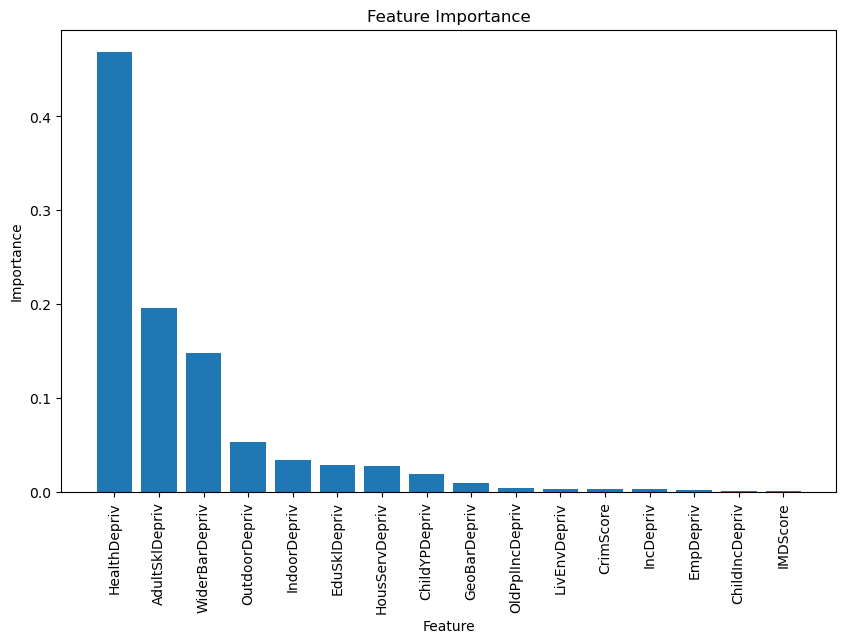

In [11]:
import matplotlib.pyplot as plt

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=90)
plt.show()


# Building the Gradient boost  (hyperparameter tuned)

In [46]:
# Hyperparameter tuning using randomizedSearchCv
# Hyperparameters to be randomly tested
parameters = {
    'n_estimators': [55],
    'learning_rate': [0.15],
    'max_depth': [ 7],
    'subsample': [0.9],
    'loss': ['absolute_error']
}

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
# Create a GradientBoostingRegressor model
GBR_model = GradientBoostingRegressor(random_state=42)
# Initialize RandomizedSearchCV
GBR_grid = RandomizedSearchCV(GBR_model, param_distributions=parameters, cv=5, verbose=2, random_state=42)
#Fitting the raandom hyperparameters into  RandomizedSearchCV class
GBR_grid.fit(X_train,y_train)


C:\Users\david\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END learning_rate=0.15, loss=absolute_error, max_depth=7, n_estimators=55, subsample=0.9; total time=  17.9s
[CV] END learning_rate=0.15, loss=absolute_error, max_depth=7, n_estimators=55, subsample=0.9; total time=  18.1s
[CV] END learning_rate=0.15, loss=absolute_error, max_depth=7, n_estimators=55, subsample=0.9; total time=  18.4s
[CV] END learning_rate=0.15, loss=absolute_error, max_depth=7, n_estimators=55, subsample=0.9; total time=  17.8s
[CV] END learning_rate=0.15, loss=absolute_error, max_depth=7, n_estimators=55, subsample=0.9; total time=  18.2s


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
                   param_distributions={'learning_rate': [0.15],
                                        'loss': ['absolute_error'],
                                        'max_depth': [7], 'n_estimators': [55],
                                        'subsample': [0.9]},
                   random_state=42, verbose=2)

In [47]:
#Now checking the best estimator
best_estimator = GBR_grid.best_estimator_
#Now checking the best accuracy score
best_accuracy = GBR_grid.best_score_

In [48]:
print(best_estimator)
print(best_accuracy)

GradientBoostingRegressor(learning_rate=0.15, loss='absolute_error',
                          max_depth=7, n_estimators=55, random_state=42,
                          subsample=0.9)
0.703697755830486


In [18]:
best_estimator.loss

'absolute_error'

In [ ]:
(learning_rate=0.15, loss='absolute_error',max_depth=7, n_estimators=55, random_state=42,subsample=0.9)

criterion{‘friedman_mse’, ‘squared_error’}

max_features{‘sqrt’, ‘log2’}

In [49]:
# Access all parameter combinations and their respective results
#results = DT_grid.cv_results_
#print(results)

# Building Gradient Boost models (hyperparameter tuned)

In [5]:
#Model 1
regressor1 = GradientBoostingRegressor(learning_rate=0.15, loss='absolute_error',max_depth=7, n_estimators=55,
                                       random_state=42,subsample=0.9,criterion='squared_error',max_features=None,warm_start = True)
#Fit Model 1
regressor1.fit(X_train,y_train)

models = [regressor1]

# Now lets look at the accuracy of the model

In [6]:
modelNumber = 1
for model in models:
    print("For model "+str(modelNumber))
    print (f'Train Accuracy - : {model.score(X_train,y_train):.3f}')
    print (f'Test Accuracy - : {model.score(X_test,y_test):.3f}')
    print("----------------------------------------")
    modelNumber += 1

For model 1
Train Accuracy - : 0.769
Test Accuracy - : 0.706
----------------------------------------


In [7]:
#Publish model as a jobLib file
from joblib import dump
dump(regressor1, 'C:/Users/david/OneDrive/Documents/MLApp/Models/xGBSTpipe.joblib')

['C:/Users/david/OneDrive/Documents/MLApp/Models/xGBSTpipe.joblib']

# Now lets look at the MSE & R-Squared Value for the model

In [46]:
from sklearn.metrics import mean_squared_error, r2_score

modelNumber = 1
for model in models:
    print("For model "+str(modelNumber))
    # Predict using the trained model 2 on the test data
    y_pred = model.predict(X_test)
    # Calculate Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)
    # Calculate R-squared
    r2 = r2_score(y_test, y_pred)
    print("Mean Squared Error:", mse)
    print("R-squared:", r2)
    print("----------------------------------------")
    modelNumber += 1

For model 1
Mean Squared Error: 4261411325.134249
R-squared: 0.4889407417769559
----------------------------------------


# The feature importance score and visualization for model 1

            Feature  Importance
2      HealthDepriv    0.222772
9    WiderBarDepriv    0.113152
10     IndoorDepriv    0.111869
7    AdultSklDepriv    0.086636
11    OutdoorDepriv    0.075747
3         CrimScore    0.063449
6     ChildYPDepriv    0.057508
4    HousServDepriv    0.056311
8      GeoBarDepriv    0.055468
0         EmpDepriv    0.055223
5   OldPplIncDepriv    0.051530
1      EduSklDepriv    0.050334


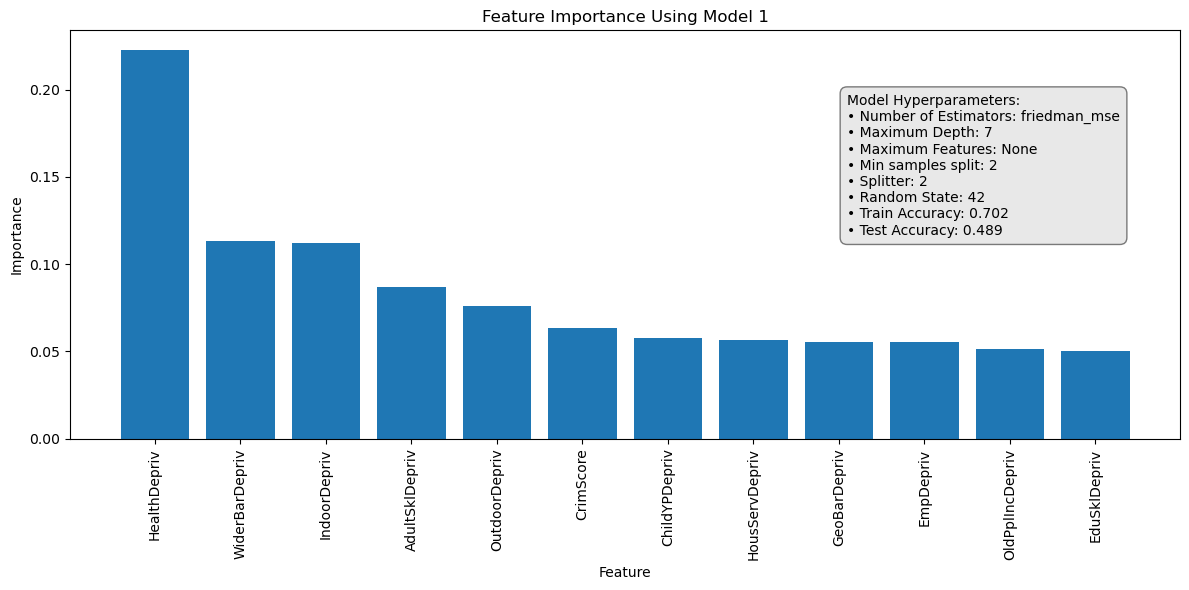

In [47]:
# Get the feature importance scores for model 1
modelIndex = 0
feature_importance = models[modelIndex].feature_importances_

# Create a DataFrame to display the results
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Sort the DataFrame in descending order of importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance
print(feature_importance_df)

# Placeholder for model hyperparameters used
model_hyperparameters = {
    'criterion': models[modelIndex].criterion,
    'max_depth': models[modelIndex].max_depth,
    'max_features': models[modelIndex].max_features,
    'min_samples_split': models[modelIndex].min_samples_split,
    'splitter': models[modelIndex].min_samples_split,
    'random_state': models[modelIndex].random_state,
    'train_accuracy' : round(models[modelIndex].score(X_train,y_train),3),
    'test_accuracy': round(models[modelIndex].score(X_test,y_test),3)
    # Add more hyperparameters if needed
}


# Plot the feature importance
plt.figure(figsize=(12, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance Using Model '+str(modelIndex+1))
plt.xticks(rotation=90)

# Adding bullet points for model hyperparameters on the right side of the plot
bullet_points = [
    f"Model Hyperparameters:",
    f"• Number of Estimators: {model_hyperparameters['criterion']}",
    f"• Maximum Depth: {model_hyperparameters['max_depth']}",
    f"• Maximum Features: {model_hyperparameters['max_features']}",
    f"• Min samples split: {model_hyperparameters['min_samples_split']}",
    f"• Splitter: {model_hyperparameters['splitter']}",
    f"• Random State: {model_hyperparameters['random_state']}",
    f"• Train Accuracy: {model_hyperparameters['train_accuracy']}",
    f"• Test Accuracy: {model_hyperparameters['test_accuracy']}",
    
    # Add more hyperparameters if needed
]


# Display the bullet points
plt.text(0.7, 0.5, "\n".join(bullet_points), transform=plt.gca().transAxes,
         bbox=dict(facecolor='lightgray', alpha=0.5, boxstyle='round,pad=0.5'))

plt.tight_layout()
plt.show()
